In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import time, pickle, os

In [ ]:
# Defining rates & factors
epsilon = .9 # Epsilon greedy factor
minEpsilon = .1
maxEpsilon = 1
epsilonDecayRate = .05

totalEpisodes = 10000
maxSteps = 100

lr = .81 # Learning rate
gamma = .96 # Discount factor

In [ ]:
def chooseAction(state, qTable, isTraining, env):
    action = 0
    if isTraining and np.random.uniform(0,1) < epsilon:
        action = env.action_space.sample()
    else:
        action = np.argmax(qTable[state, :])
    return action

In [ ]:
def updateQTable(state, action, newState, reward, qTable):
    currentQ = qTable[state, action]
    newMaxQ = np.max(qTable[newState, :])
    #newMaxQ = np.argmax(qTable[newState, :])
    qTable[state, action] = qTable[state, action] + lr*(reward + gamma*newMaxQ - currentQ)

In [ ]:
def runQLearning(totalEpisodes, isTraining = True, render = False):

    # Creating the environment
    env = gym.make("FrozenLake-v1", is_slippery = True, render_mode = 'human' if render else None)
    
    # Initialize Q-Table
    if isTraining:
        qTable = np.random.uniform(low = 0, high = 1, size = (env.observation_space.n, env.action_space.n)) # Q(s,a) initialized randomly
        #qTable = np.zeros((env.observation_space.n, env.action_space.n)) # Q(s,a) initialized with zeros
    else:
        # Load trained model Q-Table
        f = open('frozenLake_qTable_Q_Learning.pk1', 'rb')
        q = pickle.load(f)
        f.close()

    # Start
    rewards = np.zeros(totalEpisodes)

    for episode in range(totalEpisodes):
        
        terminated = False
        truncated = False

        t = 0
        state = env.reset()[0]
        action = chooseAction(state, qTable, isTraining, env)

        while t < maxSteps:
            #env.render()

            newState, reward, terminated, truncated, _ = env.step(action)

            if isTraining:
                updateQTable(state, action, newState, reward, qTable)

            state = newState

            t += 1
            rewards += 1

            if(terminated or truncated):
                if(truncated):
                    print("Truncated, starting new episode...")
                break

            if reward == 1:
                rewards[episode] = 1
            #time.sleep(.1)

        epsilon = minEpsilon + (maxEpsilon - minEpsilon) * np.exp(-epsilonDecayRate * episode)
        #os.system('clear')

        # Rewards graphic
        sumRewards = np.zeros(totalEpisodes)
        for i in range(totalEpisodes):
            sumRewards[i] = np.sum(rewards[max(0, i-100):(i+1)]) #Rewards every 100 episodes
            plt.plot(sumRewards)
            plt.savefig("frozenLake_rewards.png")

    env.close()

    print("Score over time: ", rewards/totalEpisodes)
    print(qTable)

    # Saving the Q-Table after the training
    if isTraining:
        with open("frozenLake_qTable_Q_Learning.pk1", 'wb') as f:
            pickle.dump(qTable, f)


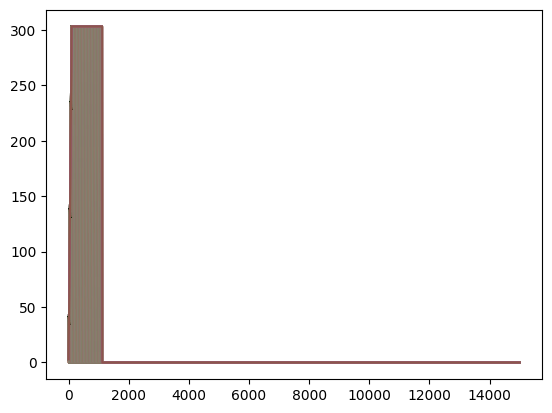

In [25]:
if __name__ == '__main__':
    runQLearning(15000, isTraining = True)